In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os

In [2]:
sample = ["SRR1976948", "SRR1977249","SRR1977296","SRR1977304","SRR1977357","SRR1977365"]
sample_triplicate = list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in sample))
file_list= list(map(lambda x:x+".tsv", sample))

In [3]:
main = pd.DataFrame(pd.read_csv(file_list[0], sep = '	', engine='python'))
  
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i], sep="	", engine = 'python')
    df = pd.DataFrame(data)
    main = pd.concat([main,df],axis=0)

main.reset_index(inplace=True)
main = main.rename(columns = {'index':'trial'})
main['sample'] = sample_triplicate

In [4]:
main.dtypes

trial          int64
s            float64
h:m:s         object
max_rss      float64
max_vms      float64
max_uss      float64
max_pss      float64
io_in        float64
io_out       float64
mean_load    float64
cpu_time     float64
sample        object
dtype: object

In [9]:
#del main['h:m:s']
main

,trial,s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,sample
0,0,838.6540,1695.50,2150.08,323.60,443.14,8.04,0.0,98.15,823.53,SRR1976948
1,1,832.1352,1443.20,2427.57,697.78,704.33,0.00,0.0,99.46,828.10,SRR1976948
2,2,686.2310,1953.95,2044.59,394.34,1148.39,0.00,0.0,98.75,678.20,SRR1976948
3,0,832.5782,1694.20,2042.76,200.61,435.52,32.86,0.0,95.98,799.42,SRR1977249
4,1,834.7484,1409.79,2141.67,300.36,434.86,0.00,0.0,99.09,827.69,SRR1977249
5,2,741.5118,2237.12,2328.63,2224.75,2228.26,0.00,0.0,99.27,736.40,SRR1977249
6,0,699.6473,1955.33,2058.96,309.68,607.75,1635.86,0.0,95.97,671.84,SRR1977296
7,1,711.3974,1797.46,2217.43,533.68,796.35,0.00,0.0,98.35,700.06,SRR1977296
8,2,706.4990,1288.01,2055.70,473.87,693.25,0.00,0.0,94.78,669.99,SRR1977296
9,0,789.4643,1785.13,2065.78,244.53,485.88,28.23,0.0,96.90,765.23,SRR1977304


In [5]:
def plot_line(metric):
    #metric = 'cpu_time'
    grouped_data = main.groupby(by='sample')[metric].mean()

    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(grouped_data.index, grouped_data.values, linestyle='solid')
    plt.xlabel('Sample')
    plt.ylabel(metric)

    trials = main[metric]
    sample = main['sample']
    plt.scatter(sample, trials, marker='o', color='black')
    plt.scatter(grouped_data.index, grouped_data.values, marker='x', color = 'green' )
    plt.show()


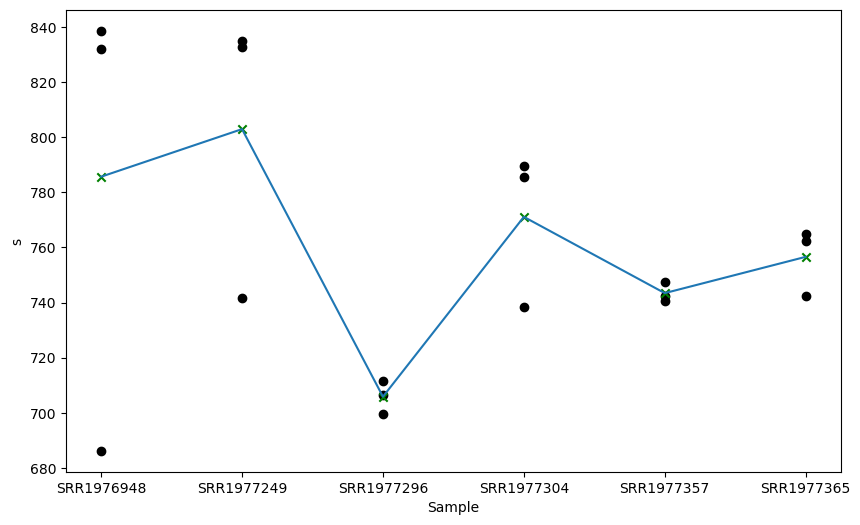

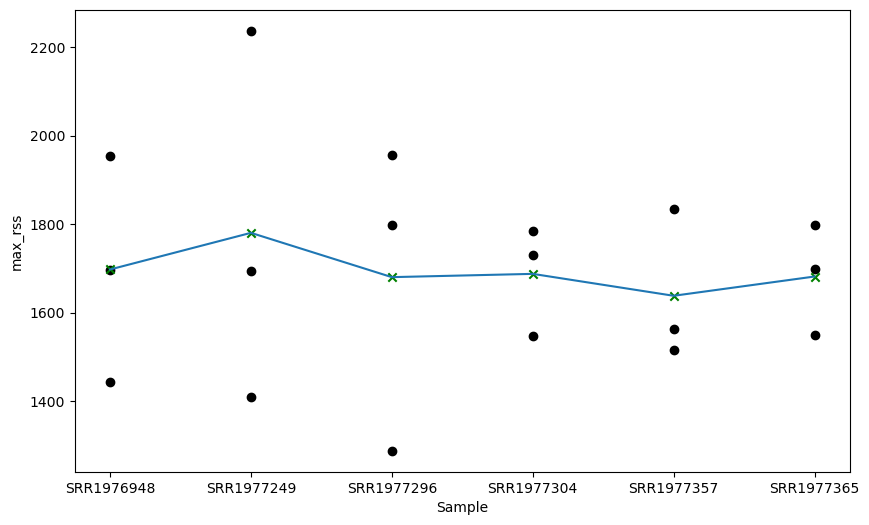

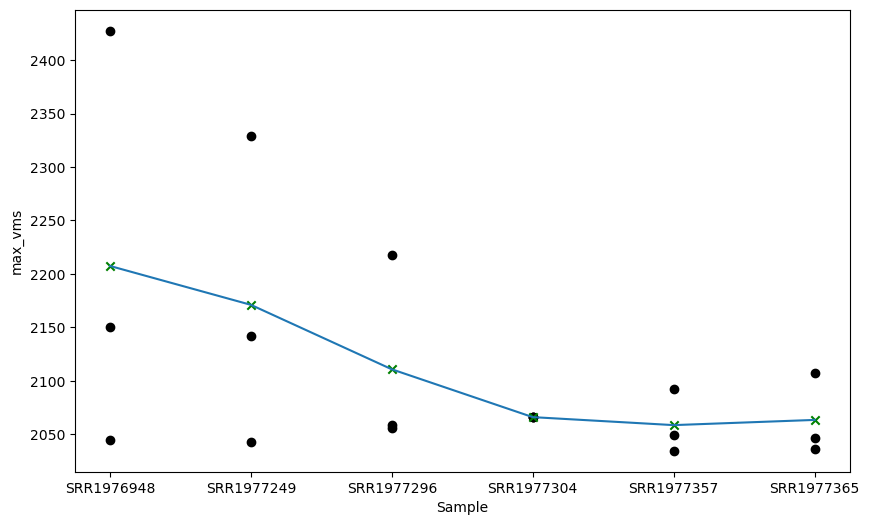

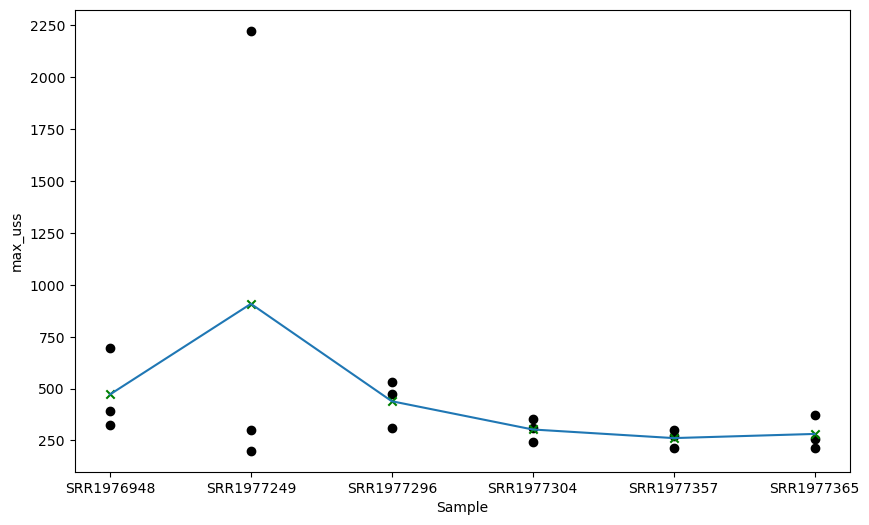

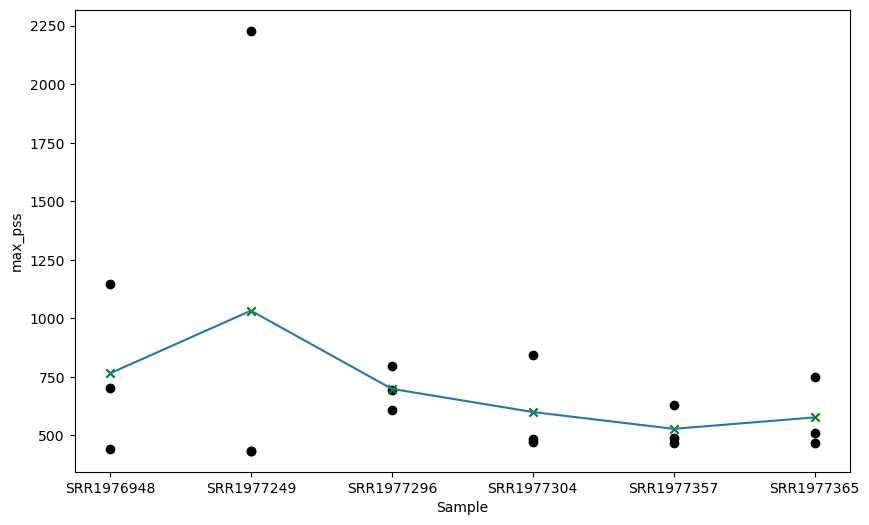

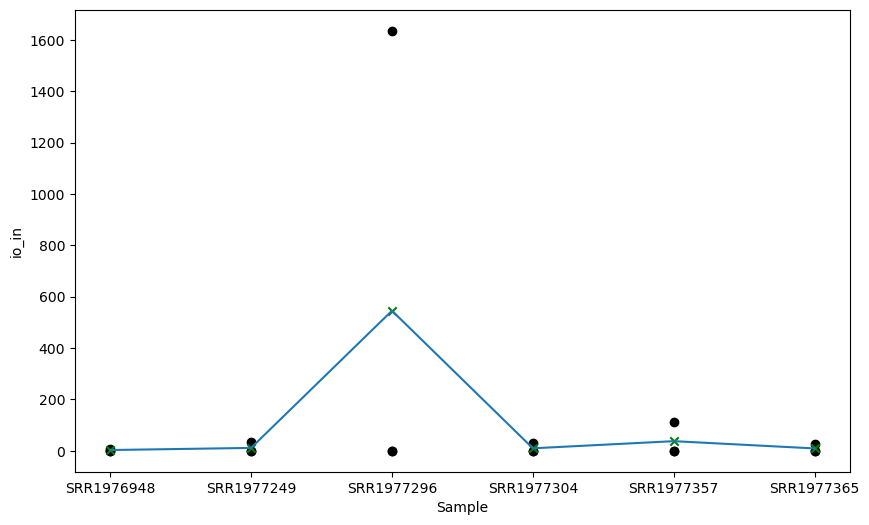

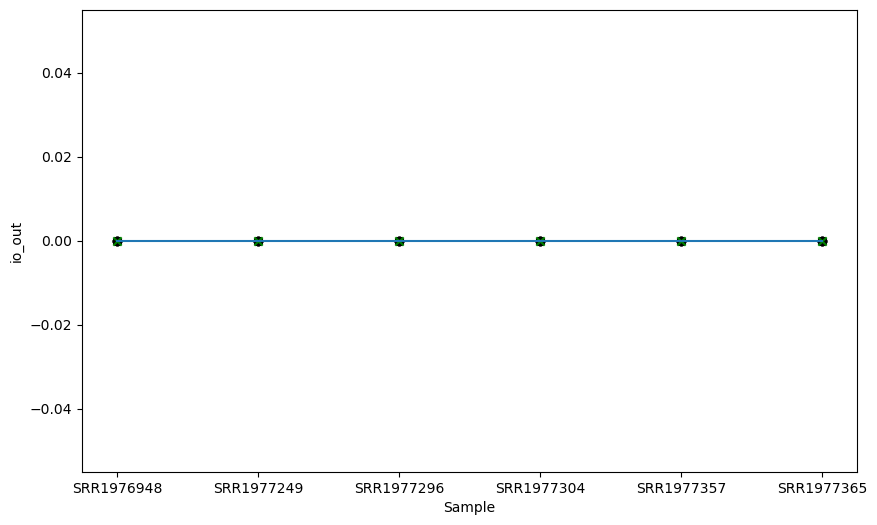

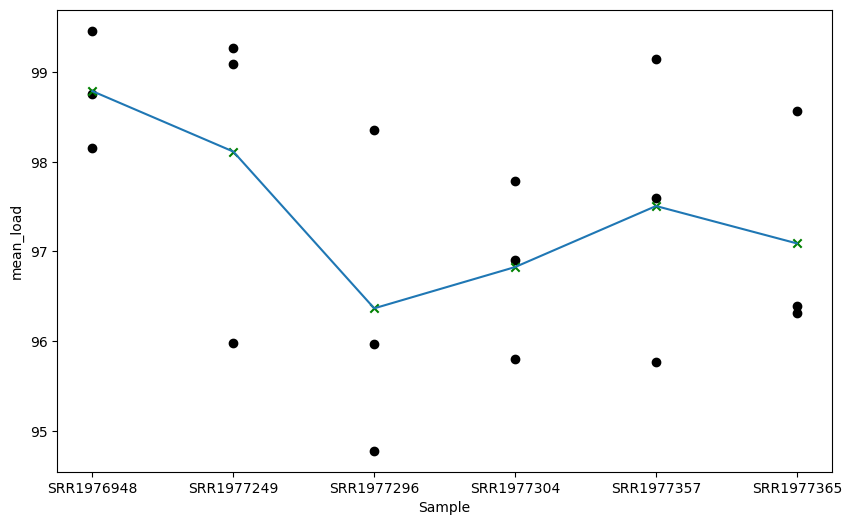

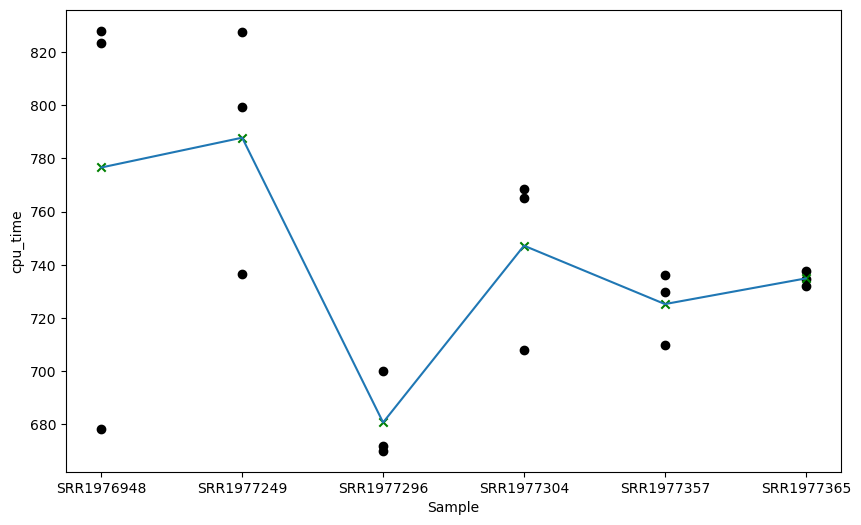

In [10]:
for i in main.columns[1:-1]:
    plot_line(i)